# Car model

Import the library

In [1]:
from carculator import *

Load the default car parameters

In [2]:
cip = CarInputParameters()

Define the calculation mode: static or stochastic(number of iterations)

In [3]:
cip.static()

Fill-in the array that will be used to create the car models

In [4]:
dcts, array = fill_xarray_from_input_parameters(cip)

We can check the powertrains, sizes and yers considered

In [5]:
list(array.powertrain.values)

['BEV',
 'FCEV',
 'HEV-p',
 'ICEV-d',
 'ICEV-g',
 'ICEV-p',
 'PHEV',
 'PHEV-c',
 'PHEV-e']

In [6]:
list(array.year.values)

[2017, 2040]

It is possible to derive car models for other years by interpolating between 2017 and 2040 (or extrapolating beyond 2040 or before 2017).

In [ ]:
array = array.interp(year=[2018, 2022, 2035, 2040, 2045, 2050],  kwargs={'fill_value': 'extrapolate'})

We can create now the car models, using the default parameters, while specifying a driving cycle

In [7]:
cm = CarModel(array, cycle='WLTC')

In [8]:
cm

Alternatively, we can override specific parameters value, by passing a dicitonary or a filepath to an Excel file.
For we wan to lower the lifetime of the car:

In [9]:
dict_param = {('Driving', 'all', 'all', 'lifetime kilometers', 'none'): {(2017, 'loc'): 150000, (2040, 'loc'): 150000}}

modify_xarray_from_custom_parameters(dict_param, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

Let's look at the Tank-to-wheel energy, for a Large diesel

In [10]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2607.382441, 1733.148634])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or we indicate a filepath to the Excel file that contains customized values

In [13]:
fp = r'C:\Users\sacchi_r\Downloads\template_workbook.xlsx'
modify_xarray_from_custom_parameters(fp, array)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

In [14]:
cm.array.sel(value=0, parameter='curb mass')

<xarray.DataArray (size: 7, powertrain: 7, year: 2)>
array([[[1699.88572 , 1585.524324],
        [1724.602604, 1607.825804],
        [1771.872604, 1643.902597],
        [1895.24957 , 1706.07346 ],
        [1966.883152, 1714.9705  ],
        [2024.244431, 1778.245009],
        [1806.777269, 1654.477575]],

       [[1320.619683, 1233.195518],
        [1340.251914, 1251.246466],
        [1381.910059, 1284.057865],
        [1465.114725, 1314.637434],
        [1489.855018, 1305.30191 ],
        [1508.53744 , 1334.210277],
        [1360.355614, 1243.902544]],

       [[1488.960053, 1390.145256],
        [1511.878796, 1410.945493],
        [1551.101357, 1441.672207],
        [1661.617234, 1492.591563],
        [1711.574564, 1492.810461],
        [1776.399734, 1558.288   ],
        [1533.440302, 1402.379142]],

       [[ 963.67519 ,  906.113756],
        [ 979.433399,  920.928437],
        [1004.978383,  942.974704],
        [1102.018357,  990.772911],
        [1067.928871,  940.969506],
     

In [15]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2607.75621 , 1733.332678])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can also override calculated parameters. For example, the driving mass:

In [16]:
cm.array.loc['Large','ICEV-d','driving mass',:] = [[2000],[2200]]

In [17]:
cm.array.loc['Large','ICEV-d','driving mass',:] 

<xarray.DataArray (year: 2, value: 1)>
array([[2000.],
       [2200.]])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'driving mass'
  * year        (year) int32 2017 2040
  * value       (value) int32 0

In [18]:
cm.set_ttw_efficiency()
cm.calculate_ttw_energy()

In [19]:
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2713.748758, 2011.812324])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can also change the driving cycle, among those offered:
* WLTC
* WLTC 3.1
* WLTC 3.2
* WLTC 3.3
* WLTC 3.4
* CADC Urban
* CADC Road
* CADC Motorway
* CADC Motorway 130
* CADC
* NEDC

In [20]:
cm = CarModel(array, cycle='CADC')
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([2995.646367, 2061.431564])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

Or even add our own driving cycle

In [21]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(1, 1000)
def f(x):
    return np.sin(x) + np.random.normal(scale=20, size=len(x)) + 70
plt.plot(x, f(x))

In [22]:
cycle = f(x)
cm = CarModel(array, cycle=cycle)
cm.set_all()
cm.array.sel(powertrain='ICEV-d', size='Large', value=0, parameter='TtW energy')

<xarray.DataArray (year: 2)>
array([12941.844774,  9539.251657])
Coordinates:
    size        <U12 'Large'
    powertrain  <U6 'ICEV-d'
    parameter   <U48 'TtW energy'
  * year        (year) int32 2017 2040
    value       int32 0

We can plot any attributes of the car models

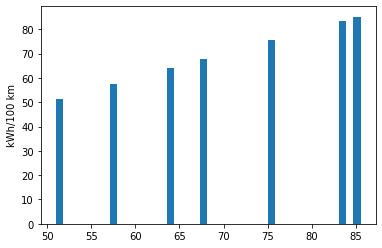

In [23]:
TtW_energy = cm.array.sel(powertrain='BEV', year=2017, parameter='TtW energy', value=0) * 1/3600 * 100

plt.bar(TtW_energy, TtW_energy)
plt.ylabel('kWh/100 km')
plt.show()

The same can be done considering uncertainties in input parameters

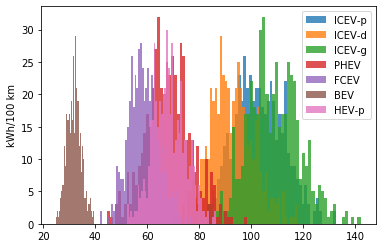

In [24]:
cip = CarInputParameters()
cip.stochastic(500)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='CADC')
cm.set_all()
TtW_energy = cm.array.sel(size='SUV', year=2017, parameter='TtW energy') * 1/3600 * 100

l_powertrains = TtW_energy.powertrain
[plt.hist(e, bins=50, alpha=.8, label=e.powertrain.values) for e in TtW_energy]
plt.ylabel('kWh/100 km')
plt.legend()

In [25]:
cm.array.sel(size='SUV', year=2017, parameter='TtW energy', value=0) * 1/3600 * 100

<xarray.DataArray (powertrain: 7)>
array([100.025052,  86.256925, 103.307561,  63.137503,  56.4196  ,  30.143269,
        64.698308])
Coordinates:
    size        <U12 'SUV'
  * powertrain  (powertrain) <U6 'ICEV-p' 'ICEV-d' 'ICEV-g' ... 'BEV' 'HEV-p'
    parameter   <U48 'TtW energy'
    year        int32 2017
    value       int32 0

We can look at noise emissions

Text(0, 0.5, 'joules per km')

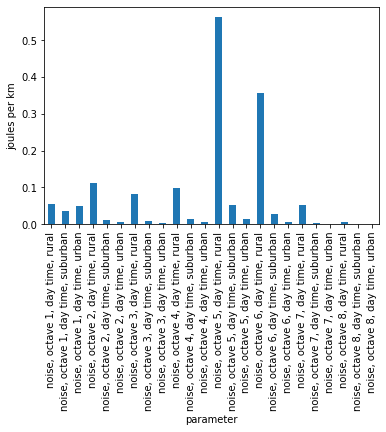

In [26]:
list_param = list(cm.array.parameter.values)
noise_emissions = [x for x in list_param if 'noise' in x]
data = cm.array.sel(parameter=noise_emissions, year=2017, size='Van', powertrain='ICEV-p', value=0)\
    .to_dataframe(name='noise emissions')['noise emissions']
data[data>0].plot(kind='bar')
plt.ylabel('joules per km')

Calculation of the inventories

In [27]:
ic = InventoryCalculation(cm.array)

We can have a look at the underlying technology matrix

In [28]:
ic.A

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

The labels of its rows and columns

In [29]:
ic.inputs

{('market for lubricating oil', 'RER', 'kilogram', 'lubricating oil'): 0,
 ('heat production, heavy fuel oil, at industrial furnace 1MW',
  'RoW',
  'megajoule',
  'heat, district or industrial, other than natural gas'): 1,
 ('straw pellets', 'RER', 'megajoule', 'straw pellets'): 2,
 ('market for potassium sulfate, as K2O',
  'GLO',
  'kilogram',
  'potassium sulfate, as K2O'): 3,
 ('market for road wear emissions, passenger car',
  'GLO',
  'kilogram',
  'road wear emissions, passenger car'): 4,
 ('Oil Palm Tree Cultivation {RER} | Fresh Fruit Bunches (FFBs) production | Alloc Rec, U',
  'RER',
  'megajoule',
  'Oil Palm Tree Cultivation {RER} | Fresh Fruit Bunches (FFBs) production | Alloc Rec, U'): 5,
 ('Stack 2020', 'GLO', 'kilowatt', 'Stack 2020'): 6,
 ('market for polypropylene, granulate',
  'GLO',
  'kilogram',
  'polypropylene, granulate'): 7,
 ('ATR NG + CCS (MDEA), 98 (average), 700 bar',
  'CH',
  'megajoule',
  'ATR NG + CCS (MDEA), 98 (average), 700 bar'): 8,
 ('market fo

For now, only the Recipe Midpoint methods are present. LCIA scores can be obtained this way:

In [30]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)
results = ic.calculate_impacts()

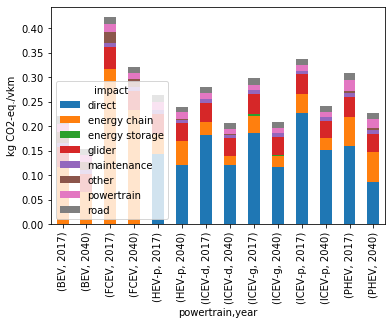

In [31]:
results.sel(impact_category='climate change', size='Large', value=0).to_dataframe('impact').unstack(level=2)['impact'].plot(kind='bar',
                stacked=True)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

We can specify a scope, to narrow the analysis down to specific vehicles

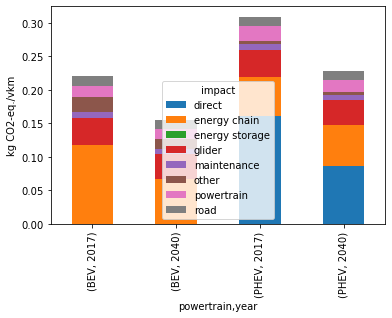

In [32]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}
results = ic.calculate_impacts(scope = scope)
results.sel(impact_category='climate change', size='Large', value=0).to_dataframe('impact').unstack(level=2)['impact'].plot(kind='bar',
                stacked=True)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

In [34]:
cip = CarInputParameters()
cip.stochastic(50)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)

scope = {
    'powertrain':['BEV', 'PHEV'],
}

results = ic.calculate_impacts(scope=scope)

Text(0, 0.5, 'kg CO2-eq./vkm')

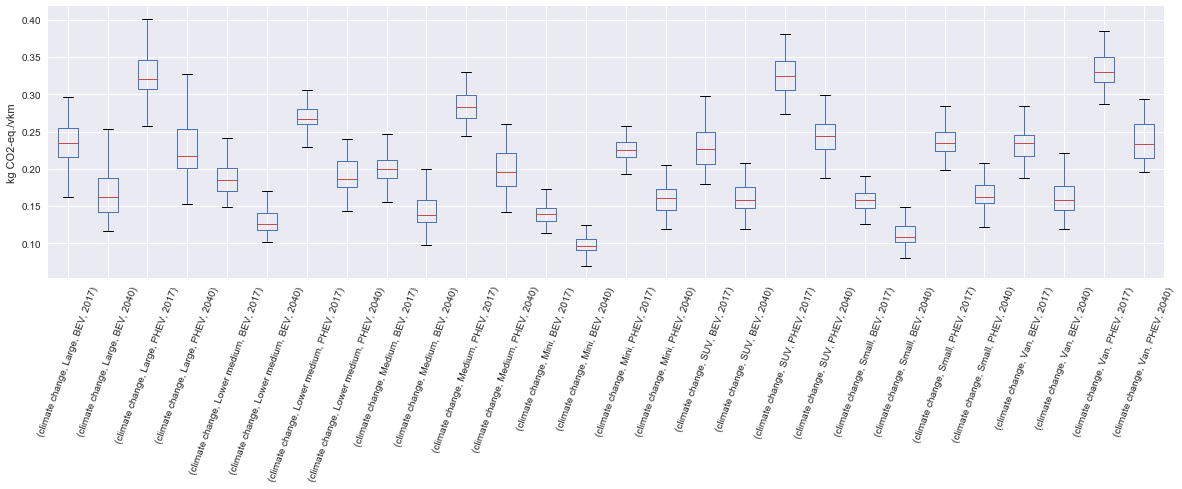

In [35]:
data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

We can specify background assumptions

For example, we wish to charge BEV batteries with German electricity

Text(0, 0.5, 'kg CO2-eq./vkm')

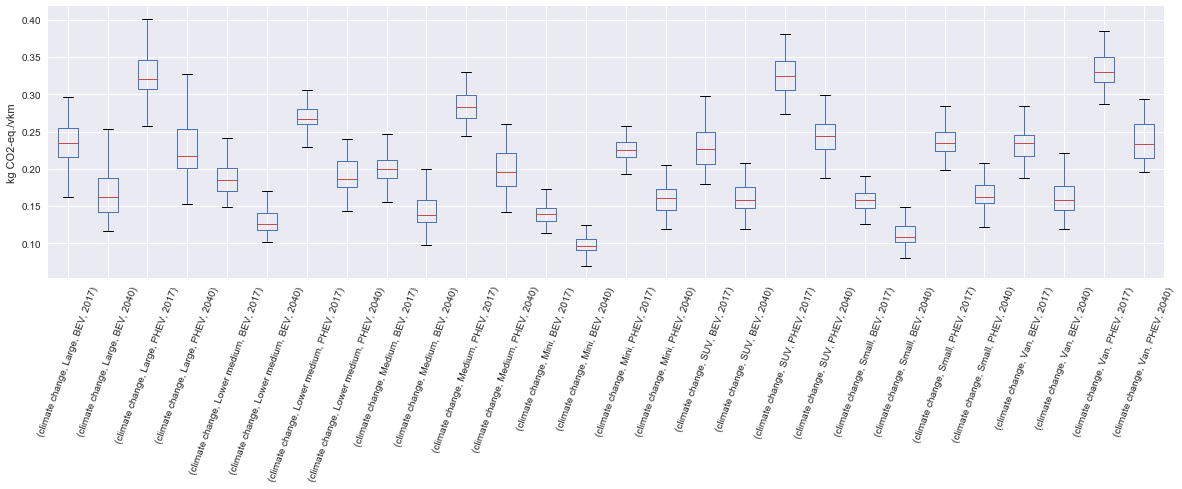

In [36]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}

background_configuration = {
   'background_country' : 'DE' 
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

Or with a specific electricity mix in mind...

Text(0, 0.5, 'kg CO2-eq./vkm')

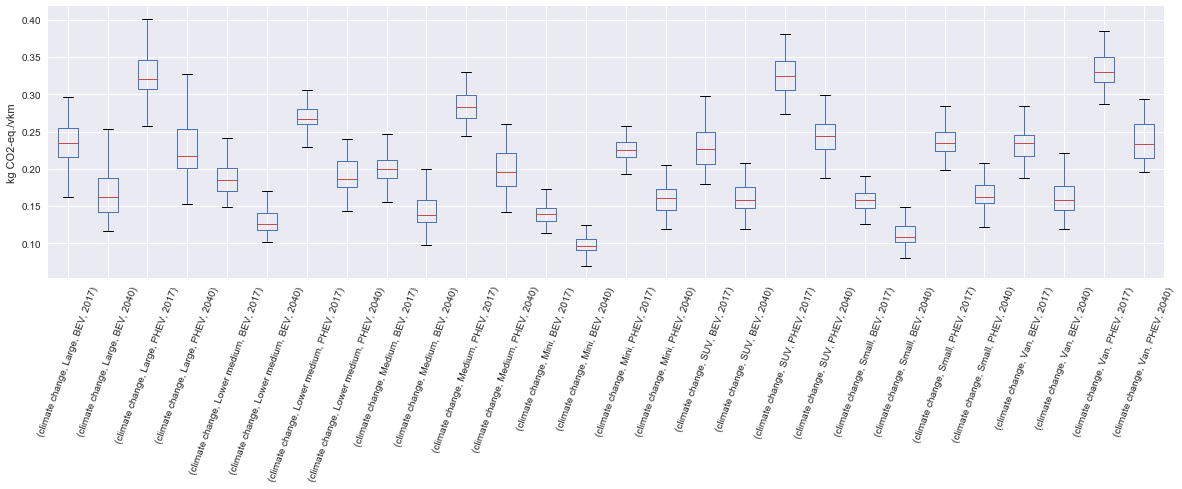

In [37]:
scope = {
    'powertrain':['BEV', 'PHEV'],
}

"""
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste
"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses of Germany
    'custom electricity mix' : [[.5,.5,0,0,0,0,0,0,0,0],
                                [.5,.5,0,0,0,0,0,0,0,0]] # in this case, 50% hydro, 50% nuclear
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')

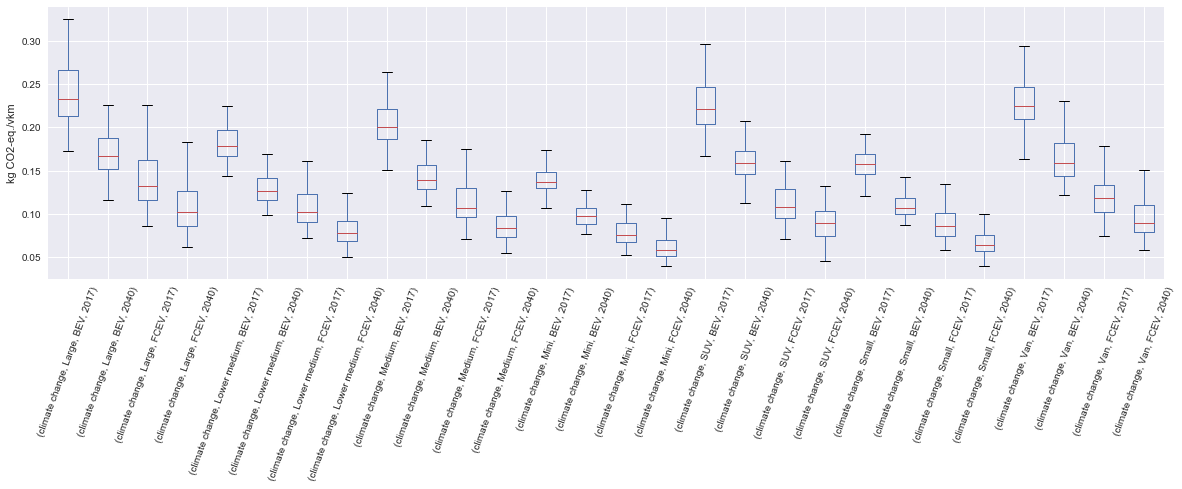

In [40]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(100)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)

scope = {
    'powertrain':['BEV', 'FCEV'],
}

"""
Electricity mixes
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste

Hydrogen technologies
Electrolysis
Electrolysis - solar
Electrolysis - hydro
Electrolysis - nuclear
SMR
"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses of Germany
    'custom electricity mix' : [[0,0,0,0,0,0,0,0,0,0],
                                [0,0,0,0,0,0,0,0,0,0]], # in this case, 50% hydro, 50% nuclear
    'hydrogen technology' : 'Electrolysis - hydro'
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

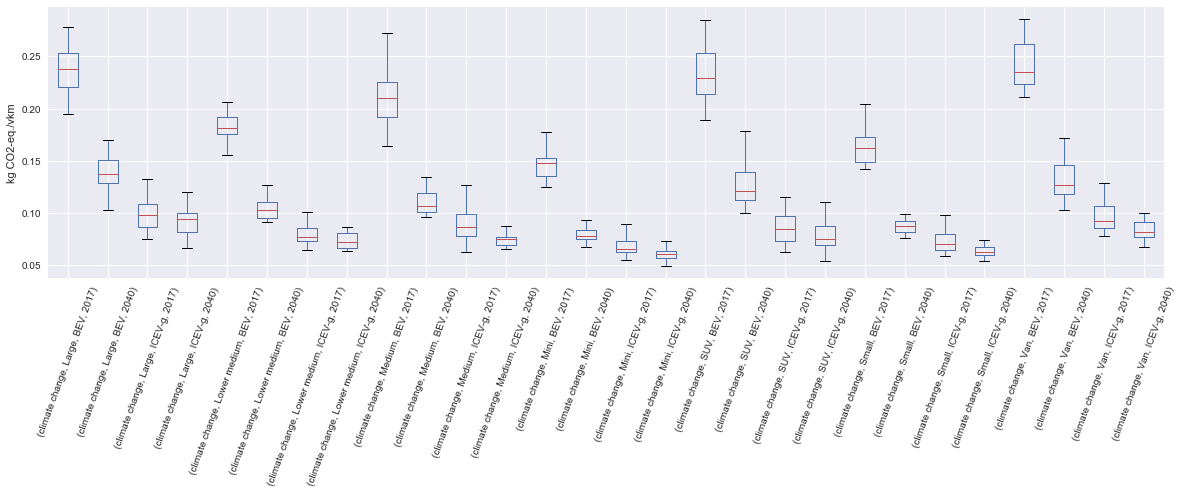

In [41]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(20)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)

scope = {
    'powertrain':['BEV', 'ICEV-g'],
}

"""
Electricity mixes
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste

Hydrogen technologies
Electrolysis
Electrolysis - solar
Electrolysis - hydro
Electrolysis - nuclear
SMR

Natural gas technologies
cng
biogas

"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses and mix of Germany
    'cng technology' : 'biogas'
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

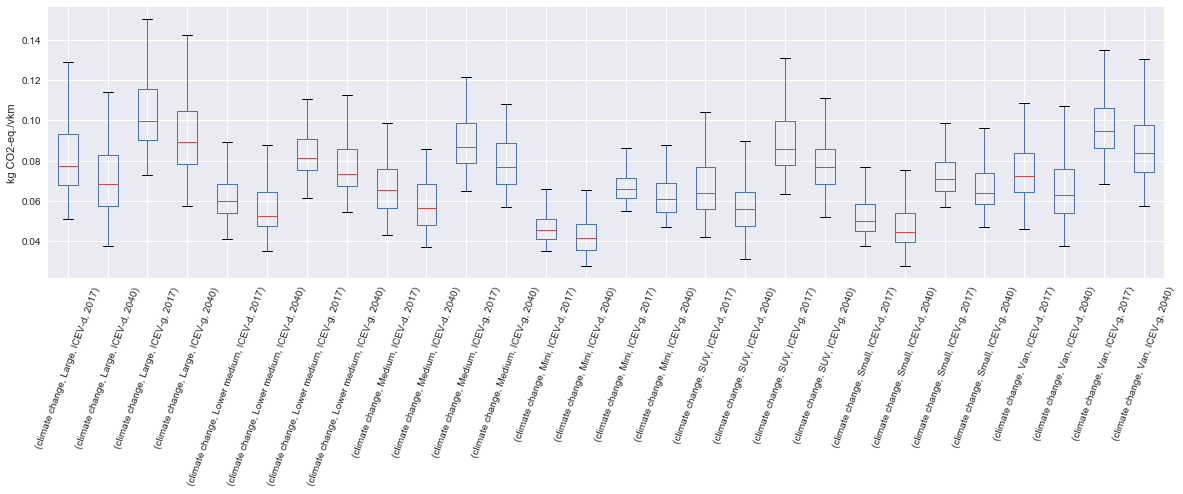

In [42]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(100)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)

scope = {
    'powertrain':['ICEV-d', 'ICEV-g'],
}

"""
Electricity mixes
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste

Electrolysis
Electrolysis - solar
Electrolysis - hydro
Electrolysis - nuclear
SMR

Natural gas technologies
cng
biogas

Diesel technologies
diesel
biodiesel - algae
biodiesel - cooking oil

"""
background_configuration = {
    'country' : 'DE', # will use the network electricity losses of Germany
    'cng technology' : 'biogas',
    'diesel technology': 'biodiesel - cooking oil'
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

data_MC = results.sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
plt.style.use('seaborn')
data_MC.unstack(level=[0,1,2]).boxplot(showfliers=False, figsize=(20,5))
plt.xticks(rotation=70)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

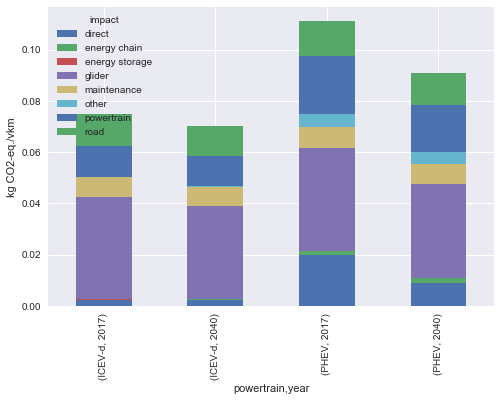

In [43]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()
ic = InventoryCalculation(cm.array)

scope = {
    'powertrain':['ICEV-d', 'PHEV'],
}

"""
Electricity mixes
0: Hydro
1: Nuclear
2: Gas
3: Solar
4: Wind
5: Biomass
6: Coal
7: Oil
8: Geothermal
9: Waste

Hydrogen technologies
Electrolysis
Electrolysis - solar
Electrolysis - hydro
Electrolysis - nuclear
SMR

Natural gas technologies
cng
biogas

Diesel technologies
diesel
biodiesel - algae
biodiesel - cooking oil

Petrol technologies
petrol
bioethanol - wheat straw
bioethanol - maize starch
bioethanol - sugarbeet
bioethanol - forest residues

"""
background_configuration = {
    'country' : 'DE', # will use the mix and network electricity losses of Germany
    'petrol technology' : 'bioethanol - maize starch',
    'diesel technology': 'biodiesel - cooking oil',
    'custom electricity mix' : [[0.5,0.5,0,0,0,0,0,0,0,0],
                                [0.5,0.5,0,0,0,0,0,0,0,0]], # in this case, 50% hydro, 50% nuclear
}

results = ic.calculate_impacts(scope = scope, background_configuration = background_configuration)

results.sel(impact_category='climate change', size='Large', value=0).to_dataframe('impact').unstack(level=2)['impact'].plot(kind='bar',
                stacked=True)
plt.ylabel('kg CO2-eq./vkm')
plt.show()

# Export inventories

Inventories in `static` calculation mode can be exported to different formats:
* as an Excel file compatible for import with `brightway2`
* a Brightway2 LCIImporter object
* a Python dictionary

## Export inventories without uncertainty 

Inventories are exported to an Excel file which can later be imported into `brightway2`. The `export_to_excel()` function returns the filepath where the Excel file can be found (the same directory as the script calling it).

In [1]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

scope = {
    'powertrain':['ICEV-d', 'PHEV'],
}

ic = InventoryCalculation(cm.array, scope=scope)

ic.export_lci_to_excel()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


Inventories exported to lci-test.xlsx.


'lci-test.xlsx'

Here, the inventory is instead returned as a `brightway2` LCIImporter object, which can be directly registered into `brightway2`.

In [2]:
i, _ = ic.export_lci_to_bw()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


In [5]:
import brightway2 as bw
bw.projects.set_current('import_36_for_carculator')

if "additional_biosphere" in bw.databases:
    del bw.databases['additional_biosphere']
if "carculator export" in bw.databases:
    del bw.databases['carculator export']
    i.apply_strategies()

i.match_database('ecoinvent 3.6 cutoff', fields=('name', 'unit', 'location', 'reference product'))
i.match_database("biosphere3", fields=('name', 'unit', 'categories'))
i.match_database(fields=('name', 'unit', 'location', 'reference product'))
i.match_database(fields=('name', 'unit', 'categories'))
i.create_new_biosphere("additional_biosphere", relink=True)
i.statistics()
#i.write_database()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.01 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
Creating new biosphere database: additional_biosphere
Applying strategy: link_iterable_by_fields
Applied 1 strategies in 0.05 seconds
264 datasets
7959 exchanges
0 unlinked exchanges
  


(264, 7959, 0)

Finally, the inventory can be exported as a Python dictionary

In [6]:
lci, _ = ic.export_lci()

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:00:00


In [7]:
lci[0]

{'production amount': 1,
 'database': 'carculator export',
 'name': 'Electricity, high voltage, natural gas CCPP, at grid',
 'unit': 'kilowatt hour',
 'location': 'RER',
 'exchanges': [{'name': 'Electricity, high voltage, natural gas CCPP, at grid',
   'database': 'carculator export',
   'amount': 1.0,
   'unit': 'kilowatt hour',
   'type': 'production',
   'location': 'RER',
   'reference product': 'Electricity, high voltage, natural gas CCPP, at grid',
   'uncertainty type': 0},
  {'name': 'transmission network construction, long-distance',
   'database': 'carculator export',
   'amount': 3.17e-10,
   'unit': 'kilometer',
   'type': 'technosphere',
   'location': 'UCTE',
   'reference product': 'transmission network, long-distance',
   'uncertainty type': 0},
  {'name': 'Ozone',
   'database': 'biosphere3',
   'amount': 4.158e-06,
   'unit': 'kilogram',
   'type': 'biosphere',
   'categories': ('air',),
   'uncertainty type': 0},
  {'name': 'electricity production, natural gas, combi

# Export inventories with uncertainty

Additionally, if the model has been run in `stochastic` mode, the exported inventories will include that uncertainty. The user can choose how that uncertainty should be characterized. The uncertainty of a given exchange can be expressed:
* as an array of values to be reused for pre-sampling by `brightway2` (preferre doption, and default option)
* as a parametrized distribution which can be interpreted by `brightway2`

By default, `presamples=True` and uncertainty information is delivered as an array of values. If the argument `presamples=False` is given, teh uncertainty is parametrized and given as parameters in the inventory.

Therefore, two options:

* `presamples=False`: the distribution that best fits the uncertainty is identified (among a dozen of possible distribution types in `scipy`) through the minimization of the summed square of error, and its parameters are included in the inventory, which will then be interpreted by the Monte Carlo function of `brightway2`. Be aware that this option has multiple incovenients. First, it is time-consuming as every single uncertain exchange goes through the process of identifying the underlying distribution. Second, the orthogonality between input and outputs of a same activity is lost: the Monte Carlo function of `brightway2` will pick randomly input and output values without considering the relation between them.
* `presamples=True`: alongside the inventory, an array that stores the pre-sampled random values generated by CarModel for each uncertain exchange is returned. This array of pre-sampled values can then be passed to the Monte Carlo function of `brightway2` which will use these values instead of randomly generated ones. This has the advantage of preserving the relation between inputs and outputs of a same activity.


## Option 1: uncertainty characterized as parametrized distributions
Exported as a `brightway` LCIImporter object. 

In [2]:
from carculator import *
import matplotlib.pyplot as plt
cip = CarInputParameters()
cip.stochastic(50)
dcts, array = fill_xarray_from_input_parameters(cip)
cm = CarModel(array, cycle='WLTC')
cm.set_all()

scope = {
    'powertrain':['ICEV-d', 'PHEV'],
}

ic = InventoryCalculation(cm.array, scope=scope)

lci = ic.export_lci_to_bw(presamples=False)

0% [##############################] 100% | ETA: 00:00:00 | Item ID: 691
Total time elapsed: 00:10:45


In [4]:
lci.data[0]

{'production amount': 1,
 'database': 'carculator export',
 'name': 'Electricity, high voltage, natural gas CCPP, at grid',
 'unit': 'kilowatt hour',
 'location': 'RER',
 'exchanges': [{'name': 'Electricity, high voltage, natural gas CCPP, at grid',
   'database': 'carculator export',
   'amount': 1.0,
   'unit': 'kilowatt hour',
   'type': 'production',
   'location': 'RER',
   'reference product': 'Electricity, high voltage, natural gas CCPP, at grid',
   'uncertainty type': 0},
  {'name': 'transmission network construction, long-distance',
   'database': 'carculator export',
   'amount': 3.17e-10,
   'unit': 'kilometer',
   'type': 'technosphere',
   'location': 'UCTE',
   'reference product': 'transmission network, long-distance',
   'uncertainty type': 0},
  {'name': 'Ozone',
   'database': 'biosphere3',
   'amount': 4.158e-06,
   'unit': 'kilogram',
   'type': 'biosphere',
   'categories': ('air',),
   'uncertainty type': 0},
  {'name': 'electricity production, natural gas, combi